In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
boston = load_boston()

In [3]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
features = pd.DataFrame(boston.data, columns = boston.feature_names)
target = pd.DataFrame(boston.target, columns=["TARGET"])

In [6]:
data = pd.concat([features, target], axis = 1)

In [7]:
data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [8]:
correlation = data.corr("pearson")

In [9]:
abs(correlation["TARGET"].sort_values())

LSTAT      0.737663
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
TARGET     1.000000
Name: TARGET, dtype: float64

In [10]:
X = data["RM"]
Y = data['TARGET']
Z = data["LSTAT"]

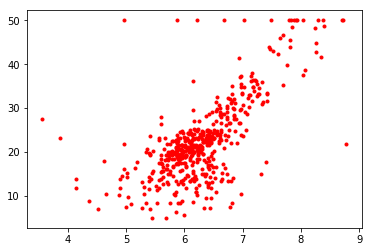

In [11]:
plt.plot(X,Y,'r.')

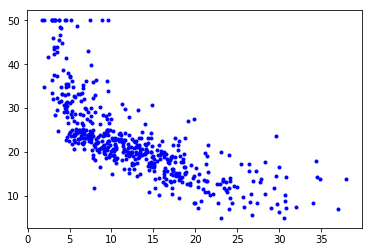

In [12]:
plt.plot(Z,Y,'b.')

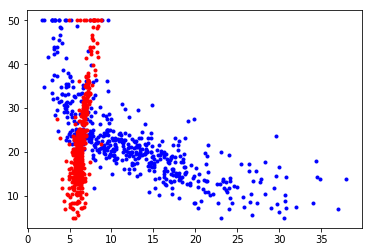

In [13]:
plt.plot(Z,Y,'b.',X,Y,'r.')

In [14]:
X =(X-X.min())/(X.max()-X.min())
Y =(Y-Y.min())/(Y.max()-Y.min())
Z =(Z-Z.min())/(Z.max()-Z.min())

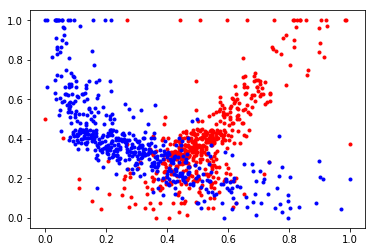

In [15]:
plt.plot(X,Y,'r.',Z,Y,"b.")

In [18]:
x = np.array(X)
y = np.array(Y)
z = np.array(Z)

In [19]:
z_train, z_test, y_train, y_test = train_test_split(z,y,test_size = 0.2)

In [20]:
z_train.size

404

In [21]:
def hypothesis(a,x,b):
    return a*x + b

In [22]:
def error(a,x,b,y):
    e = 0
    m = len(x)
    
    for i in range(m):
        e += np.power((hypothesis(a,x[i],b) - y[i]), 2)
    return (1/(2*m))*e  

In [23]:
def step_gradient(a,x,b,y,learning_rate):
    grad_a = 0
    grad_b = 0
    m = len(x)
    
    for i in range(m):
        grad_a += (1/m) * (hypothesis(a,x[i],b) - y[i]) * x[i]
        grad_b += (1/m) * (hypothesis(a,x[i],b) - y[i])
    a = a - grad_a * learning_rate
    b = b - grad_b * learning_rate
    
    return a,b

In [24]:
def descend(init_a, x, init_b, y, learning_rate, iterations):
    a = init_a
    b = init_b
    
    for i in range(iterations):
        e = error(a,x,b,y)
        
        if i % 1000 == 0:
            print(f"Error: {np.sqrt(e)}, a:{a}, b:{b}")
            
        a,b = step_gradient(a,x,b,y,learning_rate)
    return a,b    

In [36]:
a = -0.6877839546323716
b = 0.5931575059501335
learning_rate = 0.005
iterations = 10000

In [ ]:
final_a,final_b = descend(final_a,z_train,final_b,y_train,learning_rate,iterations)

Error: 0.09529582890245425, a:-0.7645497138197013, b:0.6201622211428917
Error: 0.0952956921117098, a:-0.7648933342264626, b:0.6202714507014377
Error: 0.09529559719884163, a:-0.7651795627271757, b:0.6203624366037909
Error: 0.09529553134314929, a:-0.7654179849890925, b:0.6204382259280112
Error: 0.0952954856489123, a:-0.7656165856694419, b:0.6205013568254039
Error: 0.09529545394378776, a:-0.7657820158181153, b:0.6205539435221028
Error: 0.09529543194506629, a:-0.7659198156184042, b:0.6205977471235679
Error: 0.09529541668117085, a:-0.7660345999253287, b:0.6206342345932491
Error: 0.09529540609026035, a:-0.7661302128151043, b:0.6206646278805392


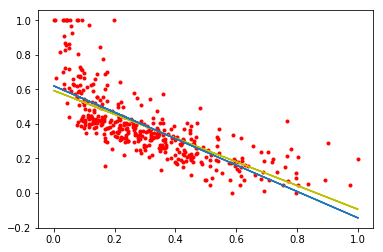

In [33]:
plt.plot(z_train,y_train,'r.',
         z_train,hypothesis(a,z_train,b),"y",
         z_train,hypothesis(final_a,z_train,final_b))

In [115]:
final_a,final_b

(-0.6976753230726294, 0.5962689290594333)

In [116]:
hypothesis(final_a,z_test[:3],final_b)

array([0.39201023, 0.33849099, 0.33752841])

In [117]:
y_test[:3]

array([0.36      , 0.26666667, 0.14888889])

In [118]:
np.sqrt(error(final_a, z_test,final_b,y_test))

0.10839829175362446

In [119]:
0.10349507265322903 #error observed

0.10349507265322903